Group8:WANG Hanqing, WANG Zuohui, XU Alice, SERHANE Ziad
Subject for the Final Project:
Question 1: Sales & Marketing
Question 2: Cuba

In [1]:
# Import the Libraries:

import pandas as pd
import numpy as np
import math
from random import gauss as normal_dist
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### **Activity 1:**

DATA from:
>* *https://raw.githubusercontent.com/cvfranco/DataSetPython/main/Company_Data_STUDENTS.csv*

* *Import the data.*
* *Perform the Data Preparation tasks you consider appropriate.*
* *To improve your analysis later you require somme new features. Based on what you know, and following the companies variable compensation policy, determine the variable compensation for each employee.*


* *Import the data.*

In [2]:
path = r"https://raw.githubusercontent.com/cvfranco/DataSetPython/main/Company_Data_STUDENTS.csv"
df_company_data = pd.read_csv(path)
df_company_data

,Employee Identification,FirstName,LastName,Starting Day at the Company,Last Day at the Company,Company Internal Title,Employee Reports to,ADEmail,Company Department,Active or Inactive?,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,MaritalDesc,Performance Score,Current Employee Rating,Annual Gross Fixed Salary (USD)
0,3427,Uriah,Bridges,20-Sep-19,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Fin & Acc,07-10-1969,MA,Accounting,Female,34904,Widowed,Fully Meets,4,75187.0
1,3428,Paula,Small,11-Feb-23,NaN,Production Tech I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,Aerial,30-08-1965,MA,Labor,Male,6593,Widowed,Fully Meets,3,NaN
2,3429,Edward,Buck,10-Dec-18,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,General - Sga,06-10-1991,MA,Assistant,Male,2330,Widowed,Fully Meets,4,79914.0
3,3430,Michael,Riordan,21-Jun-21,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,Finance & Accounting,04-04-1998,ND,Clerk,Male,58782,Single,Fully Meets,2,77265.0
4,3431,Jasmine,Onque,29-Jun-19,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,General - Con,29-08-1969,FL,Laborer,Female,33174,Married,Fully Meets,3,75655.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3422,Jakobe,Erickson,22-Jun-22,07-Aug-22,Production Technician I,Bethany Carter,jakobe.erickson@bilearner.com,PYZ,Leave of Absence,...,Eng,23-06-1998,MA,Model Assistant,Female,44500,Widowed,Fully Meets,3,96586.0
2996,3423,Adyson,Strickland,28-Dec-20,NaN,Production Technician I,Caroline Harris,adyson.strickland@bilearner.com,SVG,Active,...,Engineers,10-06-2001,MA,Engineer,Male,35444,Widowed,Fully Meets,3,97249.0
2997,3424,Annabel,Wilkins,09-Dec-20,04-Aug-22,Production Technician I,Mr. James Castillo,annabel.wilkins@bilearner.com,TNS,Voluntarily Terminated,...,Wireline Construction,27-01-1997,MA,Laborer,Male,6608,Single,Fully Meets,2,62795.0
2998,3425,Kendra,Braun,28-May-19,23-Oct-21,Production Technician I,Michael Woods,kendra.braun@bilearner.com,WBL,Voluntarily Terminated,...,Aerial,28-05-1954,MA,Foreman,Female,3807,Divorced,Fully Meets,2,NaN


#### **Perform the Data Preparation tasks.**

* *1.Check the names of the columns.*

In [3]:
df_company_data.columns.to_list()

['Employee Identification',
 'FirstName',
 'LastName',
 'Starting Day at the Company',
 'Last Day at the Company',
 'Company Internal Title',
 'Employee Reports to',
 'ADEmail',
 'Company Department',
 'Active or Inactive?',
 'EmployeeType',
 'PayZone',
 'EmployeeClassificationType',
 'TerminationType',
 'TerminationDescription',
 'DepartmentType',
 'Division',
 'DOB',
 'State',
 'JobFunctionDescription',
 'GenderCode',
 'LocationCode',
 'MaritalDesc',
 'Performance Score',
 'Current Employee Rating',
 'Annual Gross Fixed Salary (USD)']

In [4]:
columns_to_rename = {'Employee Identification':'EmployeeID', 'Starting Day at the Company':'StartDate', 'Last Day at the Company':'EndDate', 'Company Internal Title':'Title', 'Employee Reports to':'Reports to', 'Company Department':'Department', 'Active or Inactive?':'Status', 'EmployeeClassificationType':'ClassificationType','JobFunctionDescription':'JobFunction','GenderCode':'Gender', 'LocationCode':'Location', 'MaritalDesc':'Marital', 'DOB':'Birth'}

df_company_data.rename(columns = columns_to_rename, inplace=True)

df_company_data.columns.to_list()

['EmployeeID',
 'FirstName',
 'LastName',
 'StartDate',
 'EndDate',
 'Title',
 'Reports to',
 'ADEmail',
 'Department',
 'Status',
 'EmployeeType',
 'PayZone',
 'ClassificationType',
 'TerminationType',
 'TerminationDescription',
 'DepartmentType',
 'Division',
 'Birth',
 'State',
 'JobFunction',
 'Gender',
 'Location',
 'Marital',
 'Performance Score',
 'Current Employee Rating',
 'Annual Gross Fixed Salary (USD)']

In [5]:
print(df_company_data['Department'].unique().tolist())
#'CCDR' - Customer Care and Support
#'EW' - Engineering and Web
#'PL' - Product Development
#'TNS' - Technology and Services
#'BPC' - Business Planning and Consulting
#'WBL' - Web and Business Leadership
#'NEL' - New Enterprises and Leadership
#'SVG' - Sales and Marketing
#'MSC' - Management and Strategic Consulting
#'PYZ' - Project and Resource Management

['CCDR', 'EW', 'PL', 'TNS', 'BPC', 'WBL', 'NEL', 'SVG', 'MSC', 'PYZ']


In [6]:
df_company_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
round(df_company_data.describe() ,2)

,EmployeeID,Location,Current Employee Rating,Annual Gross Fixed Salary (USD)
count,3000.00,3000.00,3000.00,1838.00
mean,2500.50,44997.18,2.97,81265.94
std,866.17,29987.33,1.02,96598.72
min,1001.00,1013.00,1.00,52005.00
25%,1750.75,17546.00,2.00,59843.75
50%,2500.50,44150.50,3.00,68530.50
75%,3250.25,71481.25,3.00,76742.50
max,4000.00,98052.00,5.00,1489251.00


In [8]:
round(df_company_data[df_company_data['Department'] == 'SVG'].describe(), 2)

,EmployeeID,Location,Current Employee Rating,Annual Gross Fixed Salary (USD)
count,304.00,304.00,304.00,187.00
mean,2481.62,44728.66,2.98,78203.44
std,858.27,30022.74,1.03,71250.51
min,1005.00,1218.00,1.00,52071.00
25%,1691.25,16652.00,2.00,60629.00
50%,2445.50,43352.50,3.00,69697.00
75%,3221.00,71555.00,3.00,76768.50
max,3992.00,97985.00,5.00,969458.00


In [29]:
df_SVG= df_company_data[df_company_data['Department'] == 'SVG']

vars_groupby = ['Gender']
df_SVG_grouped = df_SVG.groupby(by=vars_groupby, as_index=True).describe()
df_SVG_grouped[('Current Employee Rating', )]

round(df_SVG_grouped[('Annual Gross Fixed Salary (USD)', )],1)

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,111.0,80647.4,91480.6,52071.0,60148.0,68498.0,74746.0,969458.0
Male,76.0,74634.0,17152.7,52504.0,61123.2,73076.0,79008.5,115959.0


* *2. Check the data types.*

In [9]:
print(df_company_data.dtypes)

EmployeeID                           int64
FirstName                           object
LastName                            object
StartDate                           object
EndDate                             object
Title                               object
Reports to                          object
ADEmail                             object
Department                          object
Status                              object
EmployeeType                        object
PayZone                             object
ClassificationType                  object
TerminationType                     object
TerminationDescription              object
DepartmentType                      object
Division                            object
Birth                               object
State                               object
JobFunction                         object
Gender                              object
Location                             int64
Marital                             object
Performance

In [10]:
df_company_data['Location'] = df_company_data['Location'].astype('object')

df_company_data.dtypes

EmployeeID                           int64
FirstName                           object
LastName                            object
StartDate                           object
EndDate                             object
Title                               object
Reports to                          object
ADEmail                             object
Department                          object
Status                              object
EmployeeType                        object
PayZone                             object
ClassificationType                  object
TerminationType                     object
TerminationDescription              object
DepartmentType                      object
Division                            object
Birth                               object
State                               object
JobFunction                         object
Gender                              object
Location                            object
Marital                             object
Performance

* *3. unify the category names.*

In [11]:
print(df_company_data['Title'].unique().tolist())

['Production Technician I', 'Production Tech I', 'Area Sales Manager', 'Production Tech II', 'Production Technician II', 'IT Support', 'Network Engineer', 'Sr. Network Engineer', 'SENIOR NETWORK ENG', 'Principal Data Architect', 'Enterprise Architect', 'Sr. DBA', 'Database Administrator', 'Data Analyst', 'Data Analyst ', 'Data Architect', 'CIO', 'BI Director', 'Senior Accountant', 'Sr. Accountant', 'Software Engineering Manager', 'SOFTWARE ENG', 'Software Engineer', 'Shared Services Manager', 'Senior BI Developer', 'Production Manager', 'President & CEO', 'Administrative Assistant', 'Accountant I', 'BI Developer', 'Sales Manager', 'IT Manager - Support', 'IT Manager - Infra', 'IT Manager - DB', 'Director of Sales', 'Director of Operations', 'IT Director']


In [12]:
df_company_data['Title'].replace('Production Technician I','Production Tech I', inplace=True)
df_company_data['Title'].replace('Production Technician II','Production Tech II', inplace=True)
df_company_data['Title'].replace('Sr. Network Engineer','Senior Network Engineer', inplace=True)
df_company_data['Title'].replace('Sr. Accountant','Senior Accountant', inplace=True)
df_company_data['Title'].replace('Data Analyst ','Data Analyst', inplace=True)
df_company_data['Title'].replace('Sr. DBA','Senior Database Administrator', inplace=True)
df_company_data['Title'].replace('SOFTWARE ENG ','Software Engineer', inplace=True)

df_company_data['Title'].unique()

array(['Production Tech I', 'Area Sales Manager', 'Production Tech II',
       'IT Support', 'Network Engineer', 'Senior Network Engineer',
       'SENIOR NETWORK ENG', 'Principal Data Architect',
       'Enterprise Architect', 'Senior Database Administrator',
       'Database Administrator', 'Data Analyst', 'Data Architect', 'CIO',
       'BI Director', 'Senior Accountant', 'Software Engineering Manager',
       'SOFTWARE ENG', 'Software Engineer', 'Shared Services Manager',
       'Senior BI Developer', 'Production Manager', 'President & CEO',
       'Administrative Assistant', 'Accountant I', 'BI Developer',
       'Sales Manager', 'IT Manager - Support', 'IT Manager - Infra',
       'IT Manager - DB', 'Director of Sales', 'Director of Operations',
       'IT Director'], dtype=object)

* *4. Handle NaN values.*

In [13]:
df_company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   EmployeeID                       3000 non-null   int64  
 1   FirstName                        3000 non-null   object 
 2   LastName                         3000 non-null   object 
 3   StartDate                        3000 non-null   object 
 4   EndDate                          1533 non-null   object 
 5   Title                            3000 non-null   object 
 6   Reports to                       3000 non-null   object 
 7   ADEmail                          3000 non-null   object 
 8   Department                       3000 non-null   object 
 9   Status                           3000 non-null   object 
 10  EmployeeType                     3000 non-null   object 
 11  PayZone                          3000 non-null   object 
 12  ClassificationType  

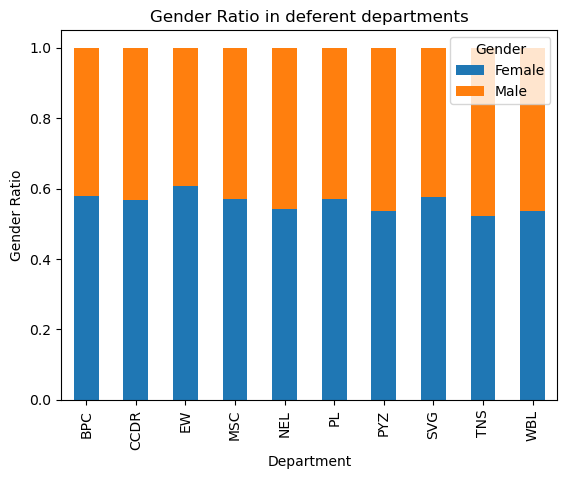

Gender      Female  Male  sum Female/Sum Male/Sum
Department                                       
BPC            175   128  303     57.76%   42.24%
CCDR           170   130  300     56.67%   43.33%
EW             183   119  302      60.6%    39.4%
MSC            169   127  296     57.09%   42.91%
NEL            165   139  304     54.28%   45.72%
PL             172   129  301     57.14%   42.86%
PYZ            160   139  299     53.51%   46.49%
SVG            175   129  304     57.57%   42.43%
TNS            155   142  297     52.19%   47.81%
WBL            158   136  294     53.74%   46.26%


In [37]:
gender_ratio = df_company_data.groupby('Department')['Gender'].value_counts(normalize=True).unstack()

gender_ratio.plot(kind='bar', stacked=True)
plt.title('Gender Ratio in deferent departments')
plt.xlabel('Department')
plt.ylabel('Gender Ratio')
plt.show()

gender_counts = df_company_data.groupby(['Department', 'Gender']).size().unstack(fill_value=0)
gender_counts['sum'] = gender_counts.sum(axis=1)
gender_counts['Female/Sum'] = (gender_counts['Female'] / gender_counts['sum']).mul(100).round(2).astype(str) + '%'
gender_counts['Male/Sum'] = (gender_counts['Male'] / gender_counts['sum']).mul(100).round(2).astype(str) + '%'
print(gender_counts)

### **Activity 2:**

DATA from:
>* *https://raw.githubusercontent.com/cvfranco/DataSetPython/main/World_Data_2023_STUDENTS.csv*

* *Import the data.*
* *Perform the Data Preparation tasks you consider appropriate.*
* *Explore the Data and define a study question.* 
* *Use the Data Visualization tools you already know to conclude on your study.*

In [14]:
path2 = r"https://raw.githubusercontent.com/cvfranco/DataSetPython/main/World_Data_2023_STUDENTS.csv"
df_world_data = pd.read_csv(path2)
df_world_data

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


* *1.Check the names of the columns.*

In [15]:
df_world_data.columns.to_list()

['Country',
 'Density\n(P/Km2)',
 'Abbreviation',
 'Agricultural Land( %)',
 'Land Area(Km2)',
 'Armed Forces size',
 'Birth Rate',
 'Calling Code',
 'Capital/Major City',
 'Co2-Emissions',
 'CPI',
 'CPI Change (%)',
 'Currency-Code',
 'Fertility Rate',
 'Forested Area (%)',
 'Gasoline Price',
 'GDP',
 'Gross primary education enrollment (%)',
 'Gross tertiary education enrollment (%)',
 'Infant mortality',
 'Largest city',
 'Life expectancy',
 'Maternal mortality ratio',
 'Minimum wage',
 'Official language',
 'Out of pocket health expenditure',
 'Physicians per thousand',
 'Population',
 'Population: Labor force participation (%)',
 'Tax revenue (%)',
 'Total tax rate',
 'Unemployment rate',
 'Urban_population',
 'Latitude',
 'Longitude']

In [16]:
cols_to_rename = {'Density\n(P/Km2)':'Density(P/Km2)', 'Agricultural Land( %)':'Agricultural Land(%)', 'Urban_population':'Urban population', 'Gasoline Price':'Gasoline Price($)', 'GDP':'GDP($)', 'Minimum wage':'Minimum wage($)'}

df_world_data.rename(columns = cols_to_rename, inplace=True)

df_world_data.columns.to_list()

['Country',
 'Density(P/Km2)',
 'Abbreviation',
 'Agricultural Land(%)',
 'Land Area(Km2)',
 'Armed Forces size',
 'Birth Rate',
 'Calling Code',
 'Capital/Major City',
 'Co2-Emissions',
 'CPI',
 'CPI Change (%)',
 'Currency-Code',
 'Fertility Rate',
 'Forested Area (%)',
 'Gasoline Price($)',
 'GDP($)',
 'Gross primary education enrollment (%)',
 'Gross tertiary education enrollment (%)',
 'Infant mortality',
 'Largest city',
 'Life expectancy',
 'Maternal mortality ratio',
 'Minimum wage($)',
 'Official language',
 'Out of pocket health expenditure',
 'Physicians per thousand',
 'Population',
 'Population: Labor force participation (%)',
 'Tax revenue (%)',
 'Total tax rate',
 'Unemployment rate',
 'Urban population',
 'Latitude',
 'Longitude']

* *2. Check the data types.*

In [17]:
print(df_world_data.dtypes)

Country                                       object
Density(P/Km2)                                object
Abbreviation                                  object
Agricultural Land(%)                          object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price($)                             object
GDP($)                                        object
Gross primary education enrollment (%)        object
Gross tertiary education enrollment (%)       

In [18]:
df_world_data['Density(P/Km2)'] = df_world_data['Density(P/Km2)'].str.replace(',', '').astype('float64')
df_world_data['Agricultural Land(%)'] = df_world_data['Agricultural Land(%)'].str.replace('%', '').astype('float64')
df_world_data['Armed Forces size'] = df_world_data['Armed Forces size'].str.replace(',', '').astype('float64')
df_world_data['Agricultural Land(%)'] = df_world_data['Agricultural Land(%)'].astype('float64')
df_world_data['Land Area(Km2)'] = df_world_data['Land Area(Km2)'].str.replace(',', '').astype('float64')
df_world_data['Armed Forces size'] = df_world_data['Armed Forces size'].astype('float64')
df_world_data['Co2-Emissions'] = df_world_data['Co2-Emissions'].str.replace(',', '').astype('float64')
df_world_data['CPI'] = df_world_data['CPI'].str.replace(',', '').astype('float64')
df_world_data['CPI Change (%)'] = df_world_data['CPI Change (%)'].str.replace('%', '').astype('float64')
df_world_data['Forested Area (%)'] = df_world_data['Forested Area (%)'].str.replace('%', '').astype('float64')
df_world_data['Gasoline Price($)'] = df_world_data['Gasoline Price($)'].str.replace('$', '').astype('float64')
df_world_data['GDP($)'] = df_world_data['GDP($)'].str.replace('$', '').str.replace(',', '').astype('float64')
df_world_data['Gross primary education enrollment (%)'] = df_world_data['Gross primary education enrollment (%)'].str.replace('%', '').astype('float64')
df_world_data['Gross tertiary education enrollment (%)'] = df_world_data['Gross tertiary education enrollment (%)'].str.replace('%', '').astype('float64')
df_world_data['Minimum wage($)'] = df_world_data['Minimum wage($)'].str.replace('$', '').astype('float64')
df_world_data['Out of pocket health expenditure'] = df_world_data['Out of pocket health expenditure'].str.replace('%', '').astype('float64')
df_world_data['Population'] = df_world_data['Population'].str.replace(',', '').astype('float64')
df_world_data['Population: Labor force participation (%)'] = df_world_data['Population: Labor force participation (%)'].str.replace('%', '').astype('float64')
df_world_data['Tax revenue (%)'] = df_world_data['Tax revenue (%)'].str.replace('%', '').astype('float64')
df_world_data['Total tax rate'] = df_world_data['Total tax rate'].str.replace('%', '').astype('float64')
df_world_data['Unemployment rate'] = df_world_data['Unemployment rate'].str.replace('%', '').astype('float64')
df_world_data['Urban population'] = df_world_data['Urban population'].str.replace(',', '').astype('float64')

df_world_data.dtypes

Country                                       object
Density(P/Km2)                               float64
Abbreviation                                  object
Agricultural Land(%)                         float64
Land Area(Km2)                               float64
Armed Forces size                            float64
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                float64
CPI                                          float64
CPI Change (%)                               float64
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                            float64
Gasoline Price($)                            float64
GDP($)                                       float64
Gross primary education enrollment (%)       float64
Gross tertiary education enrollment (%)      f

* *3. unify the category names.*

In [19]:
# print(df_world_data[''].unique().tolist())
# seem like no column need to  unify

* *4. Handle NaN values.*

In [20]:
df_world_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density(P/Km2)                             195 non-null    float64
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land(%)                       188 non-null    float64
 4   Land Area(Km2)                             194 non-null    float64
 5   Armed Forces size                          171 non-null    float64
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    float64
 10  CPI                       

In [38]:
# Physicians per thousand et life expectancy comparé à un pays avec moins de physicians et life expectancy plus bas. (c’est logique car Cuba a placé sa priorité sur la santé à partir des années 1960)

# removing NaN value
df_world_data.dropna(subset=['Physicians per thousand'], axis=0, inplace=True)
df_world_data.dropna(subset=['Life expectancy'], axis=0, inplace=True)
df_world_data.reset_index(drop=True, inplace=True)
df_world_data

,Country,Density(P/Km2),Abbreviation,Agricultural Land(%),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban population,Latitude,Longitude
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Angola,26.0,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887
4,Antigua and Barbuda,223.0,AG,20.5,443.0,0.0,15.33,1.0,"St. John's, Saint John",557.0,...,24.3,2.76,97118.0,NaN,16.5,43.0,NaN,23800.0,17.060816,-61.796428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,Venezuela,32.0,VE,24.5,912050.0,343000.0,17.88,58.0,Caracas,164175.0,...,45.8,1.92,28515829.0,59.7,NaN,73.3,8.80,25162368.0,6.423750,-66.589730
181,Vietnam,314.0,VN,39.3,331210.0,522000.0,16.75,84.0,Hanoi,192668.0,...,43.5,0.82,96462106.0,77.4,19.1,37.6,2.01,35332140.0,14.058324,108.277199
182,Yemen,56.0,YE,44.6,527968.0,40000.0,30.45,967.0,Sanaa,10609.0,...,81.0,0.31,29161922.0,38.0,NaN,26.6,12.91,10869523.0,15.552727,48.516388
183,Zambia,25.0,ZM,32.1,752618.0,16000.0,36.19,260.0,Lusaka,5141.0,...,27.5,1.19,17861030.0,74.6,16.2,15.6,11.43,7871713.0,-13.133897,27.849332


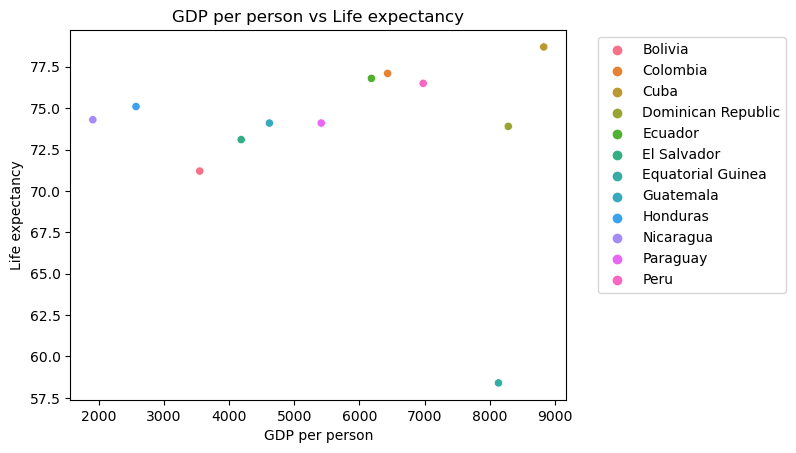

             GDP($)  Life expectancy  Population  GDP per person
count  1.200000e+01             12.0        12.0            12.0
mean   8.987230e+10             73.6  15129909.9          5591.3
std    9.510370e+10              5.2  13580820.9          2273.7
min    1.102677e+10             58.4   1355986.0          1912.9
25%    2.654083e+10             73.7   6919852.5          4028.5
50%    5.880285e+10             74.2  11036220.5          5799.3
75%    1.018762e+11             76.6  16796435.0          7266.3
max    3.238028e+11             78.7  50339443.0          8825.4
           GDP($)  Life expectancy  Population             Country  \
19   4.089532e+10             71.2  11513100.0             Bolivia   
36   3.238028e+11             77.1  50339443.0            Colombia   
41   1.000230e+11             78.7  11333483.0                Cuba   
48   8.894130e+10             73.9  10738958.0  Dominican Republic   
49   1.074357e+11             76.8  17373662.0             Ecuado

In [62]:
df_spanish = df_world_data[df_world_data['Official language'] == 'Spanish'][['GDP($)', 'Life expectancy','Population','Country']]
df_spanish = df_spanish[df_spanish['Country'] != 'Spain']
df_spanish['GDP per person'] = df_spanish['GDP($)'] / df_spanish['Population']
df_spanish = df_spanish[df_spanish['GDP per person'] <= 10000]
# not high income country(if necessary)

sns.scatterplot(x='GDP per person', y='Life expectancy', data=df_spanish, hue='Country')

plt.title('GDP per person vs Life expectancy')
plt.xlabel('GDP per person')
plt.ylabel('Life expectancy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

print(round(df_spanish.describe(),1))
print(round(df_spanish,1))